In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import os
import shutil
import yaml

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/DeepLearning/dataset/bbgt.zip" -d "/content/drive/MyDrive/DeepLearning/dataset"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 extracting: /content/drive/MyDrive/DeepLearning/dataset/train/labels/3580_png.rf.fcd7e876305e6870f9b71103e2cd607e.txt  
 extracting: /content/drive/MyDrive/DeepLearning/dataset/train/labels/3582_png.rf.9657b8aba7bb040b88a62e3f9fb79f84.txt  
 extracting: /content/drive/MyDrive/DeepLearning/dataset/train/labels/3582_png.rf.ad708415116f2ef4131560633b06b380.txt  
 extracting: /content/drive/MyDrive/DeepLearning/dataset/train/labels/3590_png.rf.8726ee88487b076db9b73ad92826be94.txt  
 extracting: /content/drive/MyDrive/DeepLearning/dataset/train/labels/3590_png.rf.a0ca4d4e00fae9d2f076fced193dfc80.txt  
 extracting: /content/drive/MyDrive/DeepLearning/dataset/train/labels/3592_png.rf.65173e70a33f6e4eea11c2a3627139b6.txt  
 extracting: /content/drive/MyDrive/DeepLearning/dataset/train/labels/3592_png.rf.de2f943b46fb327d89b1810e4a5b97d7.txt  
 extracting: /content/drive/MyDrive/DeepLearning/dataset/train/labels/3593_png.rf.24e4b60a668840

In [ ]:
# STEP 1: TAI DU LIEU DATASET
dataset_path = "/content/drive/MyDrive/DeepLearning/dataset"
# Đọc file data.yaml
yaml_path = os.path.join(dataset_path, "data.yaml")
with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)
    classes = data.get("names", [])  # Lấy danh sách nhãn

print("✅ Danh sách class:", classes)


✅ Danh sách class: ['Cam con lai', 'Cam dung va do', 'Cam nguoc chieu', 'Cam re', 'Gioi han toc do', 'Hieu lenh', 'Nguy hiem']


In [ ]:
dataset_path = "/content/drive/MyDrive/DeepLearning/dataset"

for split in ["train", "valid", "test"]:
    img_dir = os.path.join(dataset_path, split, "images")
    label_dir = os.path.join(dataset_path, split, "labels")

    if not os.path.exists(img_dir):
        print(f"❌ Không tìm thấy thư mục {img_dir}")
    else:
        print(f"📂 {split}/images: {len(os.listdir(img_dir))} ảnh")

    if not os.path.exists(label_dir):
        print(f"❌ Không tìm thấy thư mục {label_dir}")
    else:
        print(f"📄 {split}/labels: {len(os.listdir(label_dir))} file nhãn")


📂 train/images: 6390 ảnh
📄 train/labels: 6390 file nhãn
📂 valid/images: 433 ảnh
📄 valid/labels: 433 file nhãn
📂 test/images: 317 ảnh
📄 test/labels: 317 file nhãn


In [ ]:
dataset_path = "/content/drive/MyDrive/DeepLearning/dataset"
output_path = "/content/drive/MyDrive/DeepLearning/dataset_classification"
os.makedirs(output_path, exist_ok=True)

# Load danh sách nhãn từ data.yaml
yaml_path = os.path.join(dataset_path, "data.yaml")
with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)
    classes = data.get("names", [])

def convert_dataset(split):
    img_dir = os.path.join(dataset_path, split, "images")
    label_dir = os.path.join(dataset_path, split, "labels")

    # Kiểm tra nếu thư mục không tồn tại
    if not os.path.exists(img_dir) or not os.path.exists(label_dir):
        print(f"⚠️ Bỏ qua {split} vì thiếu thư mục ảnh hoặc nhãn.")
        return

    print(f"🔄 Chuyển đổi {split}...")

    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)
        img_name = label_file.replace(".txt", ".jpg")  # Đổi đuôi file nhãn sang ảnh
        img_path = os.path.join(img_dir, img_name)

        # Kiểm tra nếu ảnh không tồn tại
        if not os.path.exists(img_path):
            print(f"❌ Không tìm thấy ảnh: {img_path}, bỏ qua.")
            continue

        # Đọc file nhãn
        with open(label_path, "r") as f:
            lines = f.readlines()

        # Nếu file nhãn rỗng, bỏ qua
        if len(lines) == 0:
            print(f"⚠️ File {label_path} trống, bỏ qua.")
            continue

        # Lấy class ID từ dòng đầu tiên
        class_id = int(lines[0].split()[0])

        # Kiểm tra class ID hợp lệ
        if class_id >= len(classes):
            print(f"❌ Lỗi: Class ID {class_id} vượt quá số lượng lớp.")
            continue

        class_name = classes[class_id]

        # Tạo thư mục nếu chưa có
        class_path = os.path.join(output_path, split, class_name)
        os.makedirs(class_path, exist_ok=True)

        # Copy ảnh vào thư mục class
        shutil.copy(img_path, os.path.join(class_path, img_name))

    print(f"✅ Hoàn thành chuyển đổi {split}!")

# Chuyển đổi cả 3 tập dữ liệu
convert_dataset("train")
convert_dataset("valid")
convert_dataset("test")

print("✅ Dataset đã chuyển đổi xong!")


🔄 Chuyển đổi train...
⚠️ File /content/drive/MyDrive/DeepLearning/dataset/train/labels/10027_png.rf.36132ab3c22e1547960cb4a2d0c45b5c.txt trống, bỏ qua.
⚠️ File /content/drive/MyDrive/DeepLearning/dataset/train/labels/10027_png.rf.e3e58effcb67a2eb6dba506ad46c78c1.txt trống, bỏ qua.
⚠️ File /content/drive/MyDrive/DeepLearning/dataset/train/labels/10028_png.rf.236bca71f7dc393277f2b5f00607227d.txt trống, bỏ qua.
⚠️ File /content/drive/MyDrive/DeepLearning/dataset/train/labels/10063_png.rf.628e5f555136b70f6ff123653ab36aa8.txt trống, bỏ qua.
⚠️ File /content/drive/MyDrive/DeepLearning/dataset/train/labels/10063_png.rf.6850265e7be745358f40b4c10c9bac5b.txt trống, bỏ qua.
⚠️ File /content/drive/MyDrive/DeepLearning/dataset/train/labels/10066_png.rf.19b178ec779aa2dc141aa6f35f311546.txt trống, bỏ qua.
⚠️ File /content/drive/MyDrive/DeepLearning/dataset/train/labels/10066_png.rf.b64d1fda141ce3d12bc2dce443fc3686.txt trống, bỏ qua.
⚠️ File /content/drive/MyDrive/DeepLearning/dataset/train/labels/100

In [ ]:
output_path = "/content/drive/MyDrive/DeepLearning/dataset_classification"

for split in ["train", "valid", "test"]:
    split_path = os.path.join(output_path, split)
    if os.path.exists(split_path):
        num_classes = len(os.listdir(split_path))
        total_images = sum([len(os.listdir(os.path.join(split_path, class_name))) for class_name in os.listdir(split_path)])
        print(f"📂 {split}: {num_classes} lớp, {total_images} ảnh")
    else:
        print(f"❌ Không tìm thấy thư mục {split}")

📂 train: 7 lớp, 6049 ảnh
📂 valid: 7 lớp, 410 ảnh
📂 test: 7 lớp, 299 ảnh


In [ ]:
# Định nghĩa đường dẫn
train_dir = "/content/drive/MyDrive/DeepLearning/dataset_classification/train"
valid_dir = "/content/drive/MyDrive/DeepLearning/dataset_classification/valid"
test_dir = "/content/drive/MyDrive/DeepLearning/dataset_classification/test"

# Kích thước ảnh đầu vào
IMG_SIZE = (128, 128)  # Resize ảnh về 128x128
BATCH_SIZE = 32

# Tạo ImageDataGenerator để load ảnh từ thư mục
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load dữ liệu từ thư mục
train_data = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

test_data = test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# Lấy toàn bộ dữ liệu từ generator và chuyển thành numpy array
X_train, y_train = next(train_data)
X_test, y_test = next(test_data)

# In thông tin dữ liệu
print(f"✅ X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Found 6049 images belonging to 7 classes.
Found 410 images belonging to 7 classes.
Found 299 images belonging to 7 classes.
✅ X_train shape: (32, 128, 128, 3), y_train shape: (32, 7)
✅ X_test shape: (32, 128, 128, 3), y_test shape: (32, 7)


In [ ]:
# Lấy toàn bộ dữ liệu train
X_train, y_train = [], []
for _ in range(len(train_data)):
    X, y = next(train_data)  # Dùng next() thay vì .next()
    X_train.append(X)
    y_train.append(y)

# Chuyển thành numpy array
X_train = np.vstack(X_train)
y_train = np.vstack(y_train)
print(f"✅ Dữ liệu train đầy đủ: {X_train.shape}, {y_train.shape}")

In [ ]:
# Lấy toàn bộ dữ liệu test
X_test, y_test = [], []
for _ in range(len(test_data)):
    X, y = next(test_data)  # Dùng next() thay vì .next()
    X_test.append(X)
    y_test.append(y)

# Chuyển thành numpy array
X_test = np.vstack(X_test)
y_test = np.vstack(y_test)
print(f"✅ Dữ liệu test đầy đủ: {X_test.shape}, {y_test.shape}")

✅ Dữ liệu test đầy đủ: (299, 128, 128, 3), (299, 7)


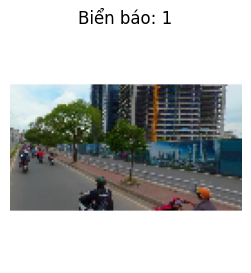

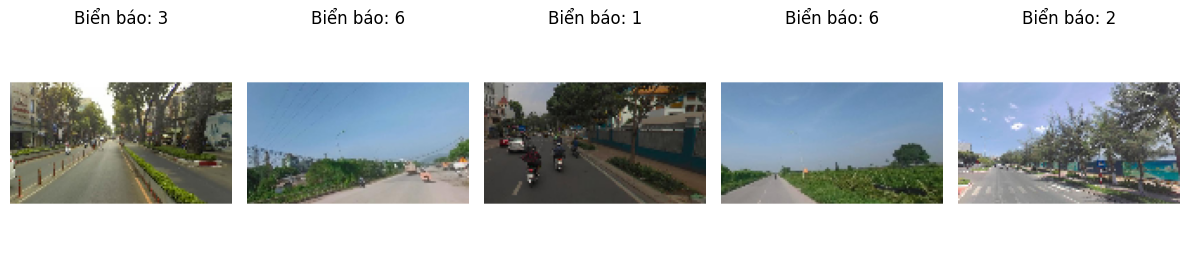

In [ ]:
#STEP 2: HIEN THI MOT SO ANH VI DU
idx = 1500

plt.figure(figsize=(6, 3))
plt.imshow(X_train[idx])  # Hiển thị ảnh màu
plt.title(f"Biển báo: {np.argmax(y_train[idx])}", fontsize=12)
  # Chuyển từ one-hot về số nguyên
plt.axis('off')  # Ẩn trục tọa độ
plt.show()



# Hiển thị thêm 5 ví dụ khác
plt.figure(figsize=(12, 4))
num_images = 5
for i in range(num_images):
    idx = np.random.randint(1, 6049)  # Chọn ngẫu nhiên chỉ số từ 1 đến 6000
    plt.subplot(1, num_images, i+1)
    plt.imshow(X_train[idx])
    plt.title(f"Biển báo: {np.argmax(y_train[idx])}", fontsize=12)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# STEP 1: XÂY DỰNG MÔ HÌNH CNN (SỬA LẠI CHO 7 LỚP)
NUM_CLASSES = 7  # Số lớp thực tế
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')  # Sửa từ 2 thành 7 lớp
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,543 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# STEP 2: HUẤN LUYỆN MÔ HÌNH
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.1875 - loss: 1.8482 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 1.0000 - loss: 0.0149 - val_accuracy: 1.0000 - val_loss: 5.7369e-07
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 1.0000 - loss: 4.0249e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 1.0000 - loss: 1.1325e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 1.0000 - loss: 7.4506e-09 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 1.0000 - loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0000e+00
✅ Test accuracy: 100.00%


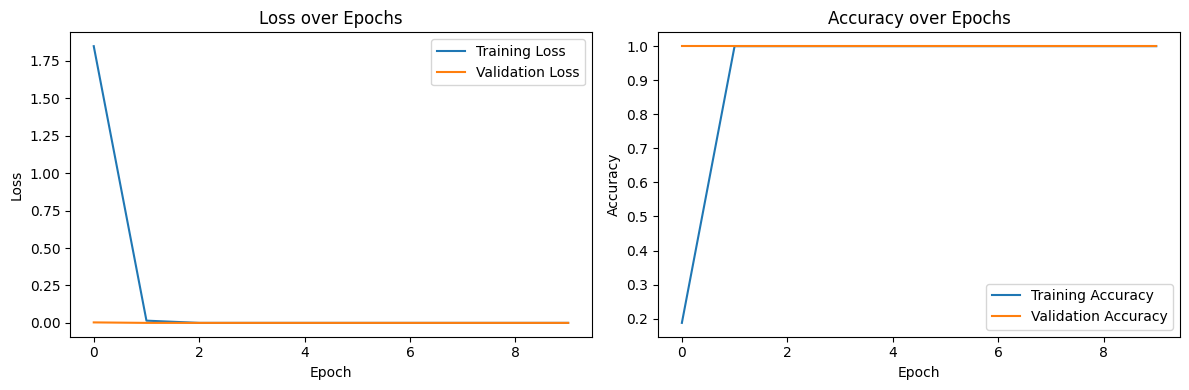

In [ ]:
# STEP 3: ĐÁNH GIÁ MÔ HÌNH
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test accuracy: {accuracy*100:.2f}%")

# STEP 4: VẼ ĐỒ THỊ HIỆU SUẤT
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# STEP 5: DỰ ĐOÁN VÀ HIỂN THỊ KẾT QUẢ MẪU (CHỌN TỪ X_test)
indices = np.random.randint(0, 299, 5)  # Chọn ngẫu nhiên 5 chỉ số từ 1 đến 317
X_sample = X_test[indices]
y_sample_true = y_test[indices]
y_sample_pred = model.predict(X_sample)

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_sample[i])
    true_label = np.argmax(y_sample_true[i])
    pred_label = np.argmax(y_sample_pred[i])
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

IndexError: index 272 is out of bounds for axis 0 with size 32

In [ ]:
# STEP 6: LƯU MÔ HÌNH
model.save('/content/drive/MyDrive/DeepLearning/traffic_sign_cnn_7classes.h5')
print("✅ Mô hình đã được lưu tại: /content/drive/MyDrive/DeepLearning/traffic_sign_cnn_7classes.h5")